In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
import seaborn as sns
import pandas as pd
import os

import logging
logging.getLogger('smote_variants').setLevel(logging.CRITICAL)

2022-08-17 08:45:47.802926: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-17 08:45:48.134608: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-17 08:45:48.134645: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
path = os.path.join('..', 'docs', 'figures')

In [3]:
dataset = sv.datasets.load_illustration_2_class()
X, y = dataset['data'], dataset['target']

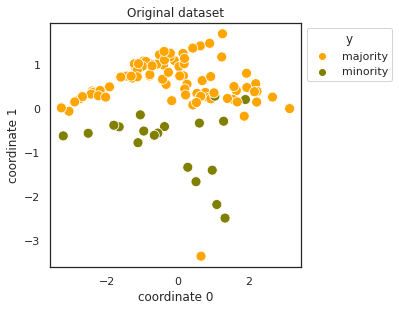

In [4]:
fig = sv.visualization.plot_raw(X=X, y=y, title='Original dataset')

plt.show()

filename = os.path.join(path, 'base.png')
fig.savefig(filename, format='png')

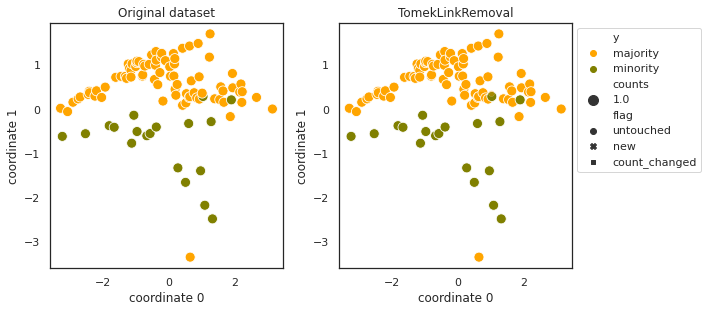

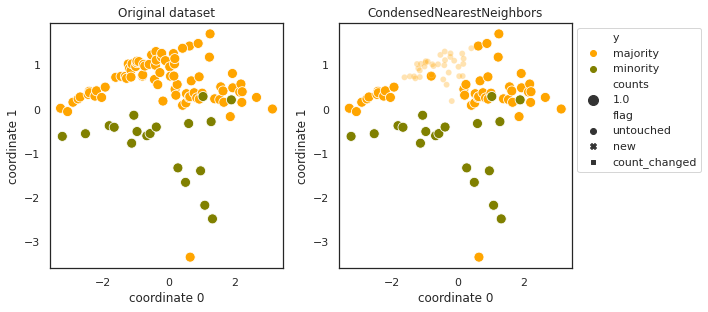

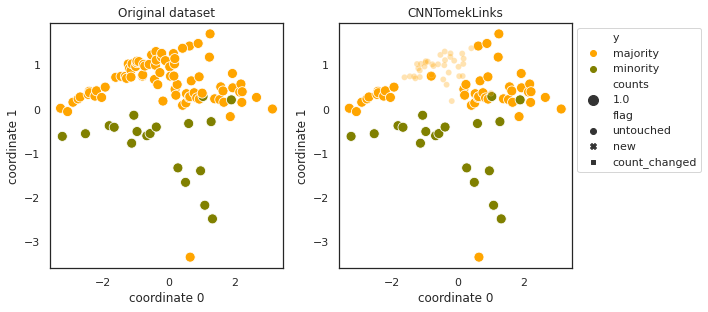

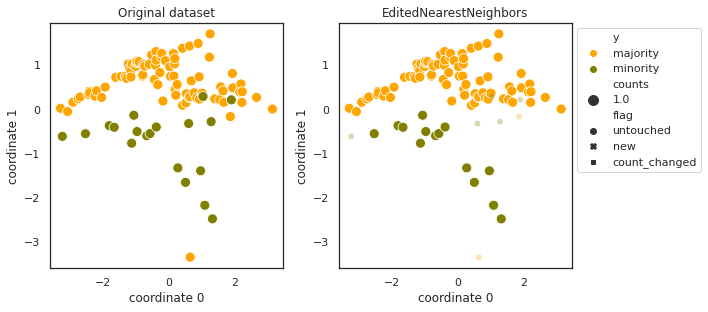

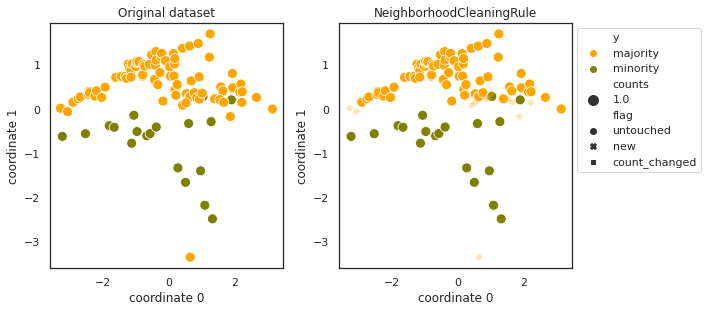

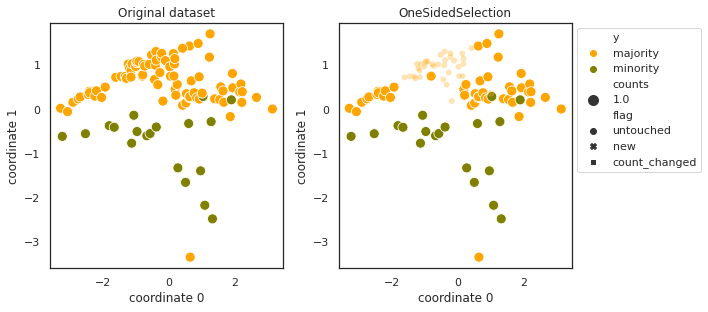

In [5]:
nfs = sv.get_all_noisefilters()

for nf in nfs:
    noise_filter= nf()
    X_nf, y_nf= noise_filter.remove_noise(X, y)
    
    fig = sv.visualization.plot_sampling_raw(X=X, y=y,
                                             X_samp=X_nf,
                                             y_samp=y_nf,
                                             title=nf.__name__)
    
    fig.tight_layout()
    
    plt.show()
    
    filename = os.path.join(path, nf.__name__ + '.png')
    fig.savefig(filename, format='png')
    

In [6]:
oversamplers = sv.get_all_oversamplers()

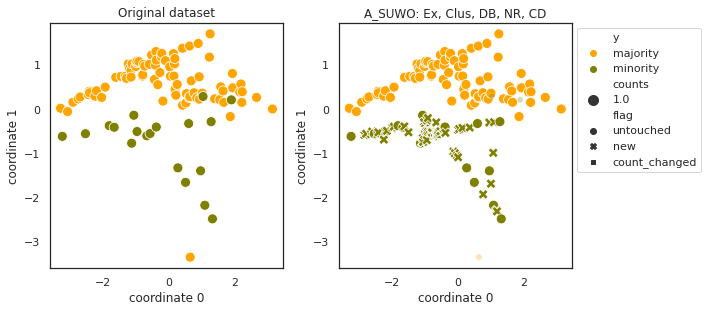

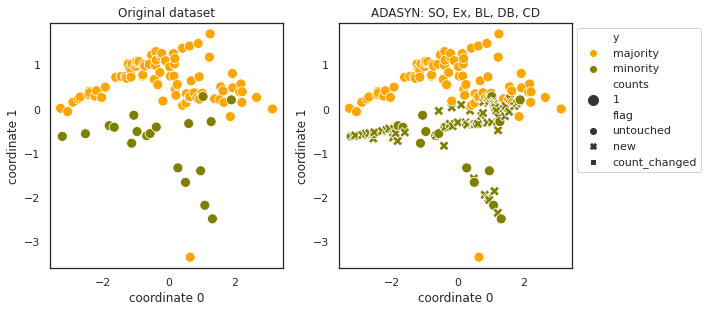

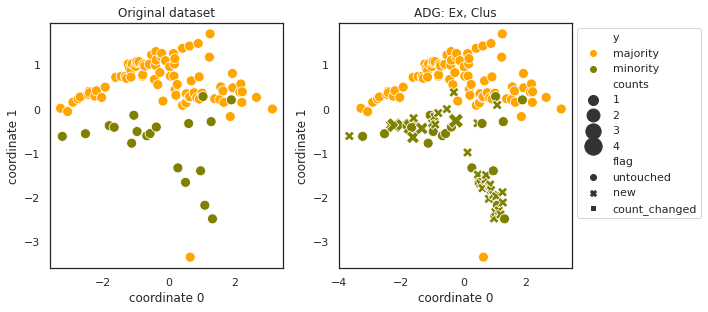

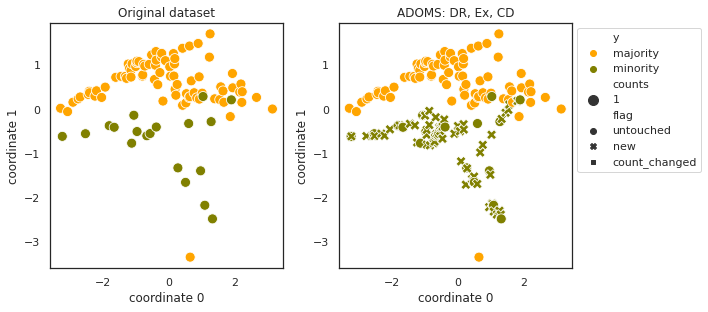

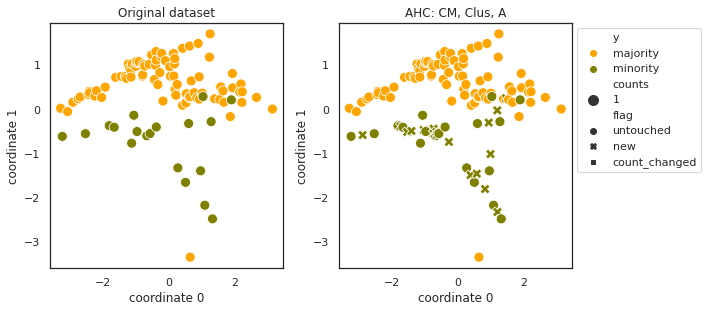

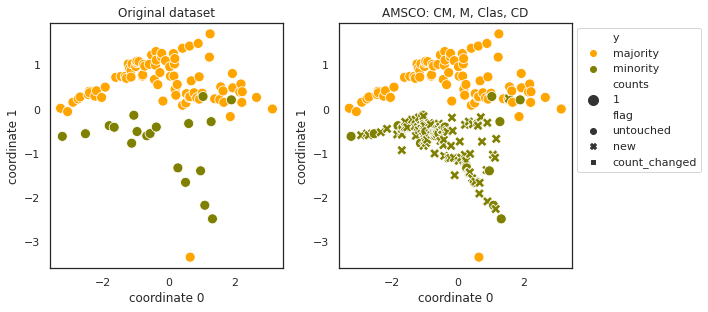

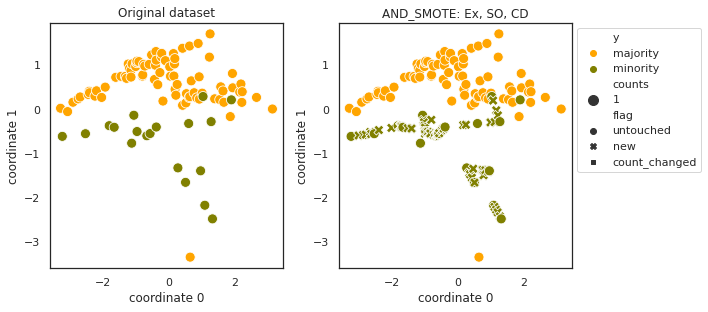

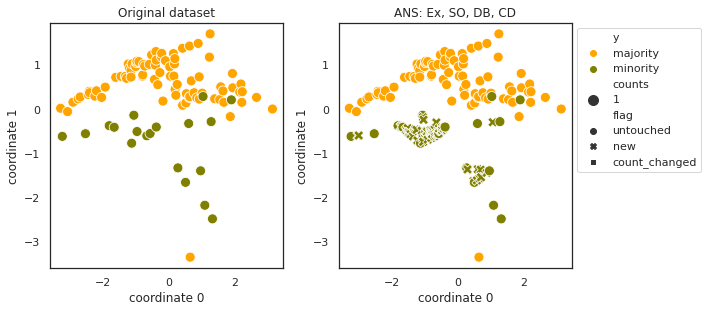

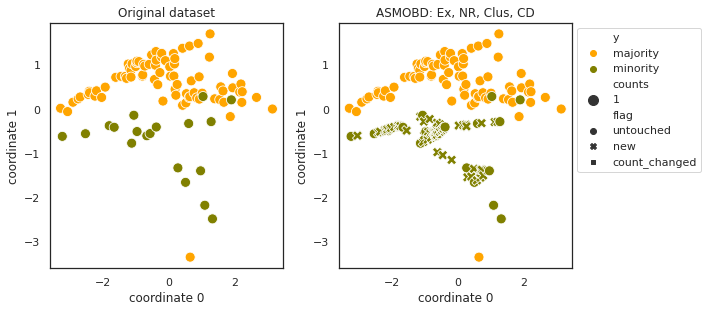

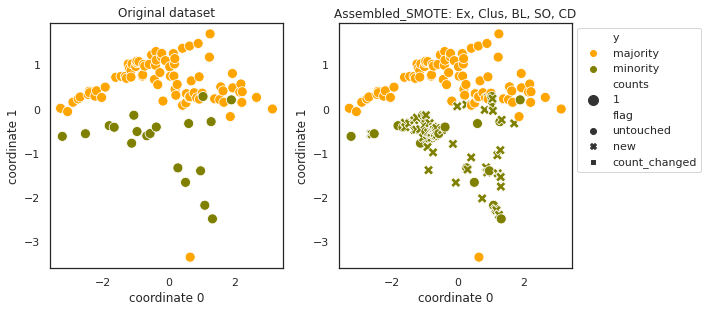

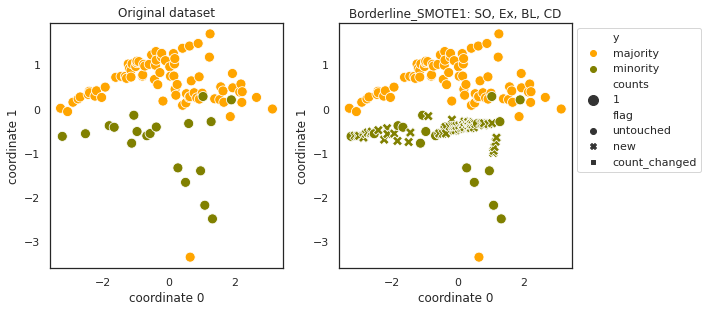

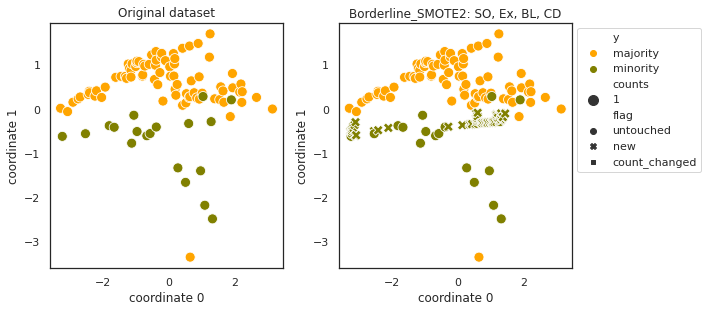

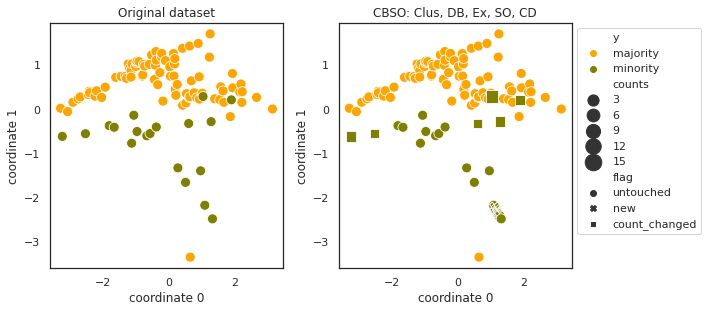

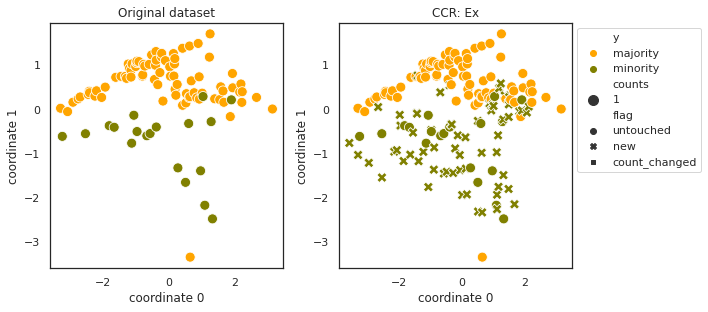

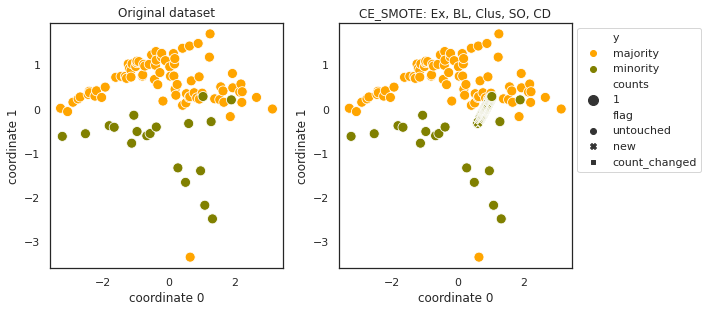

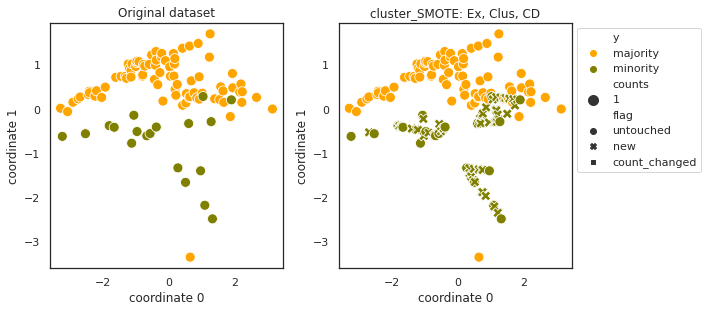

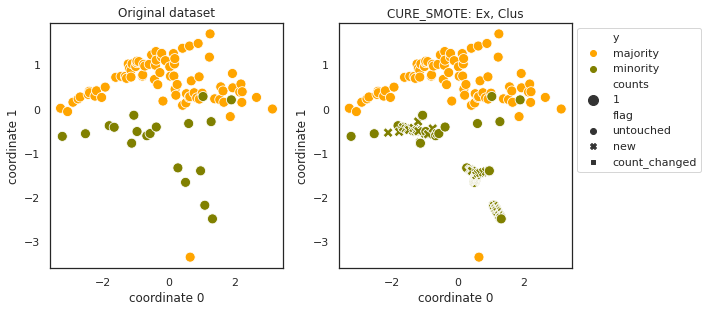

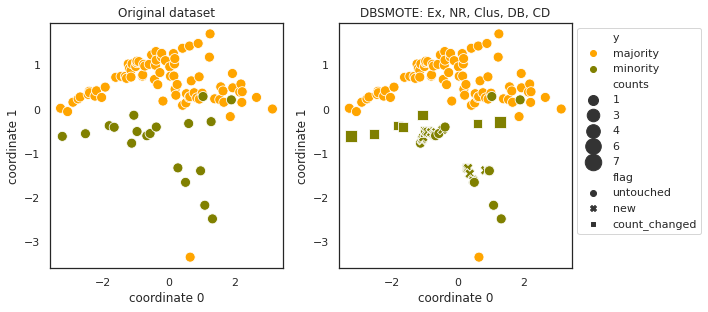

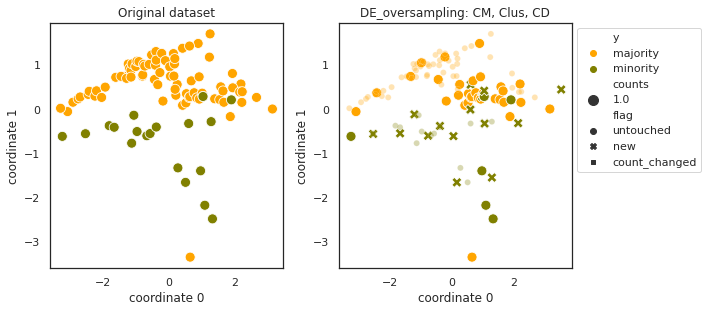

2022-08-17 08:50:36.103036: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-17 08:50:36.103093: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-17 08:50:36.103226: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (daa): /proc/driver/nvidia/version does not exist
2022-08-17 08:50:36.103962: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 3ms/step


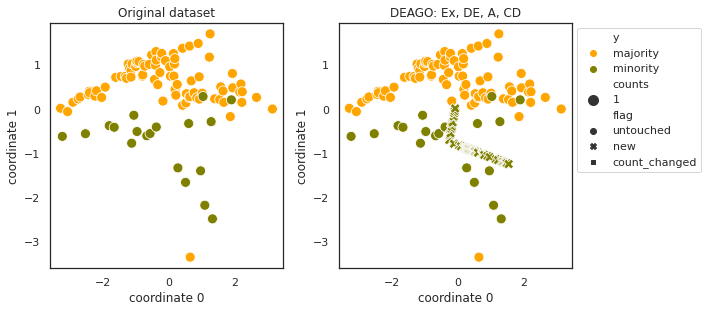

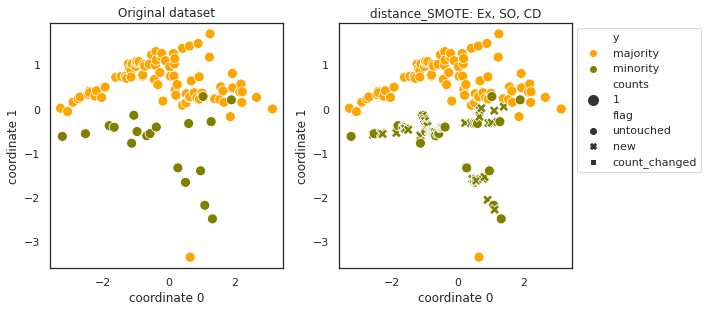

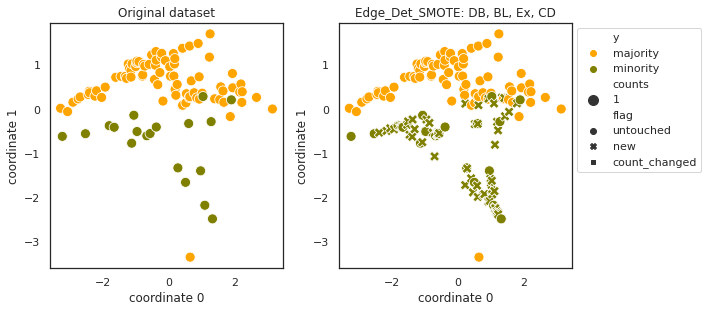

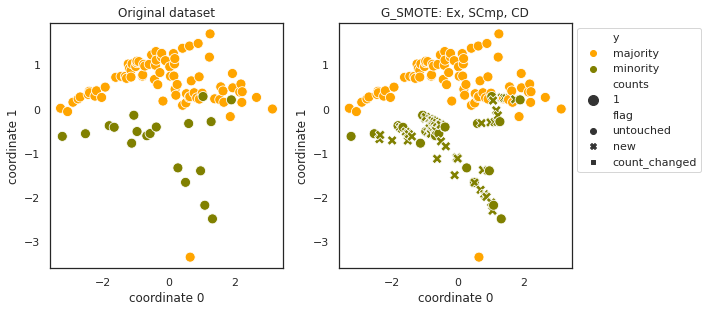

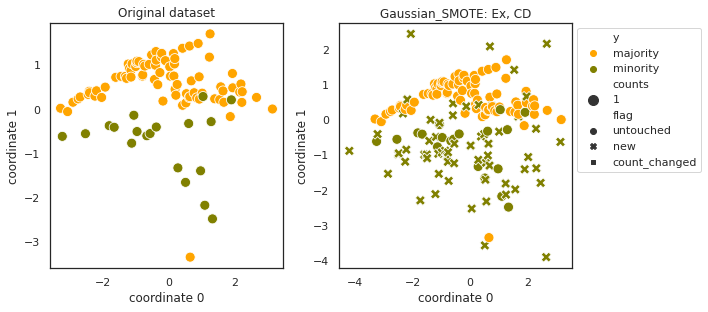

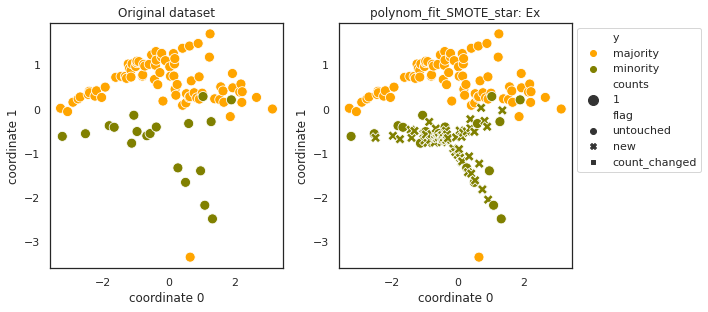

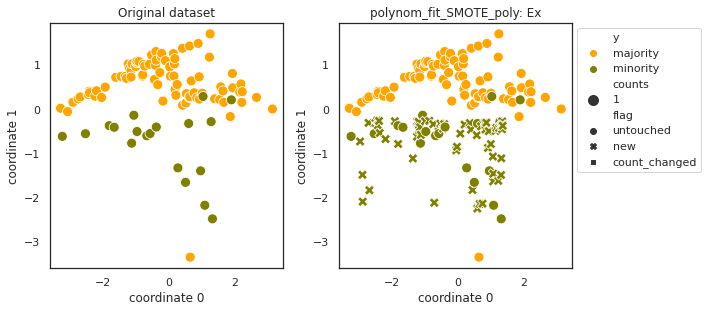

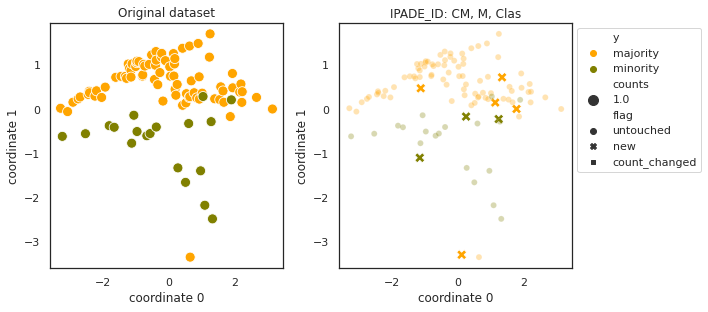

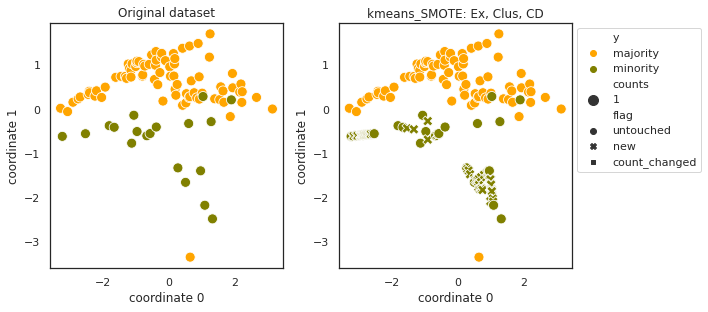

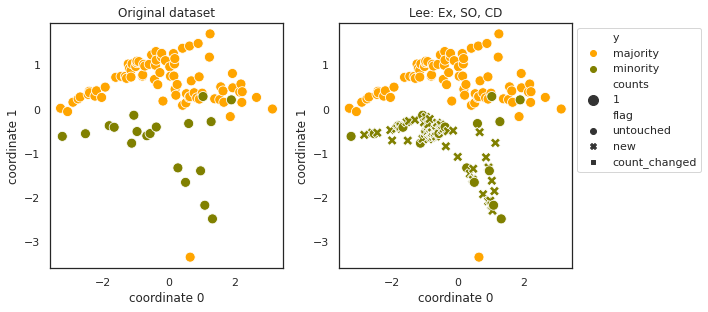

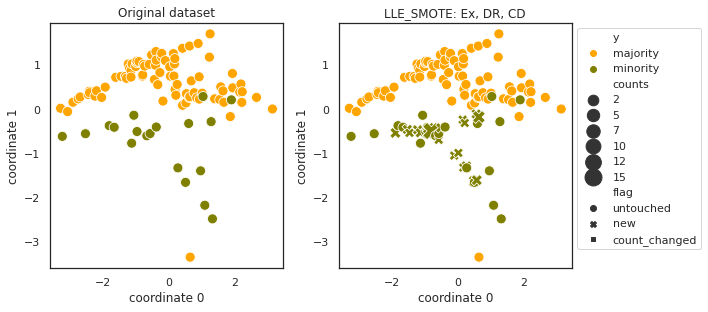

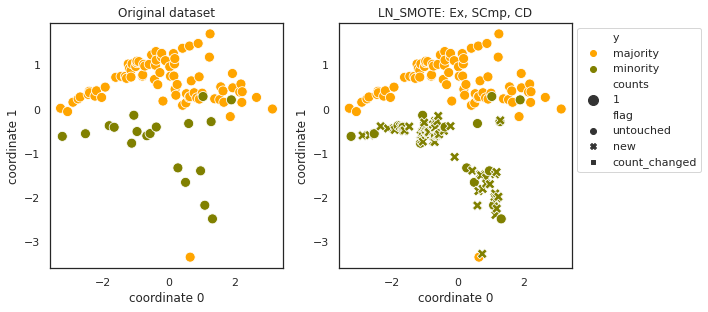

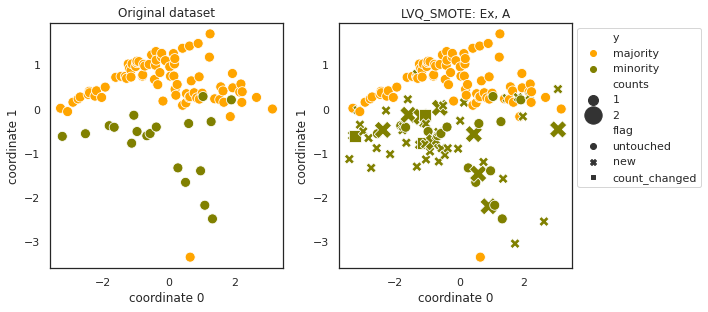

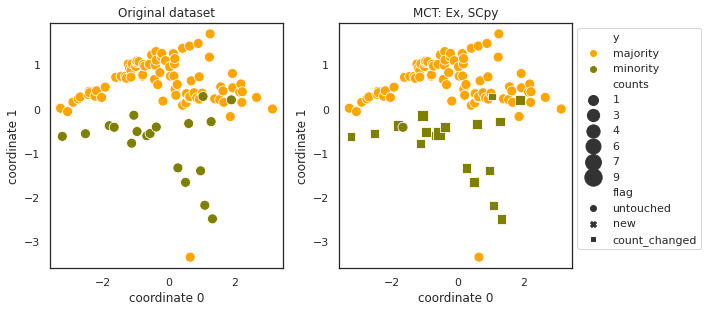

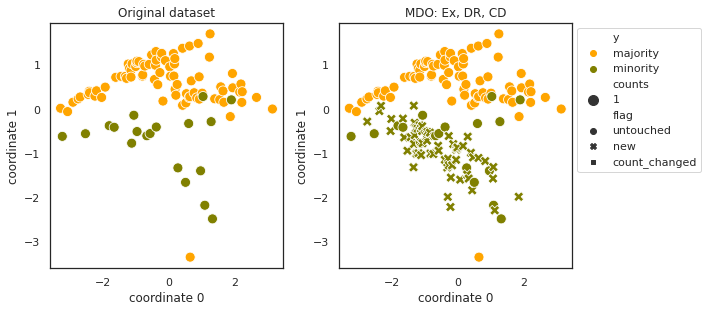

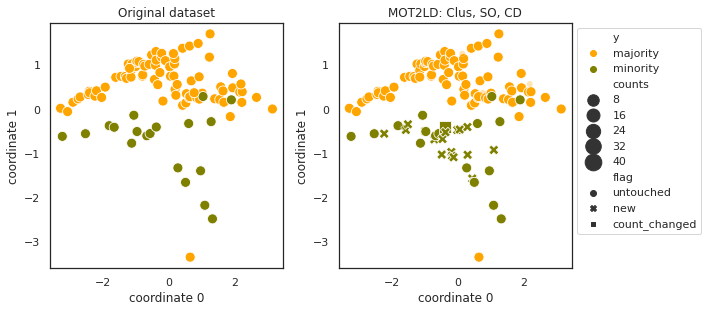

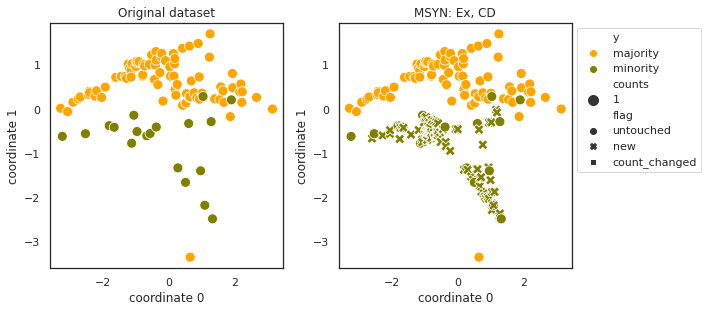

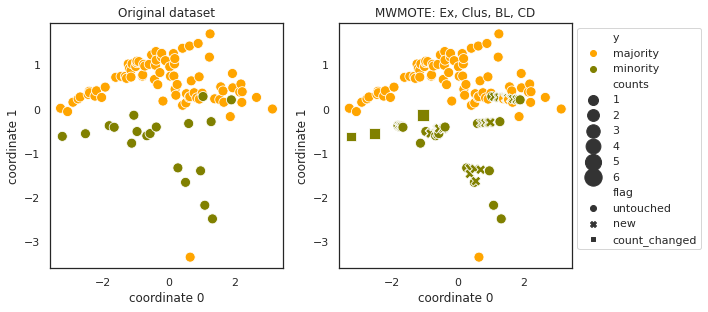

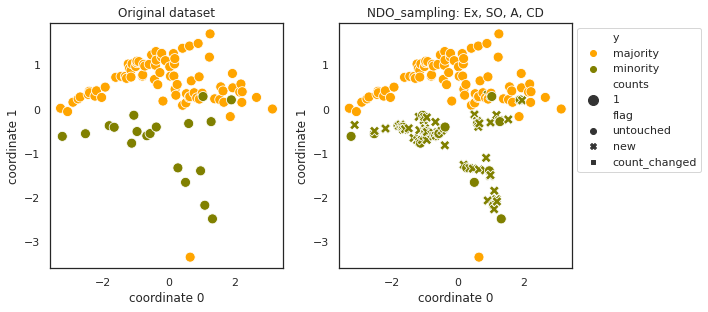

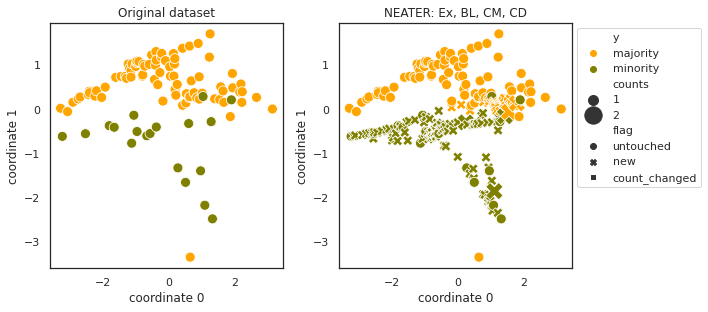

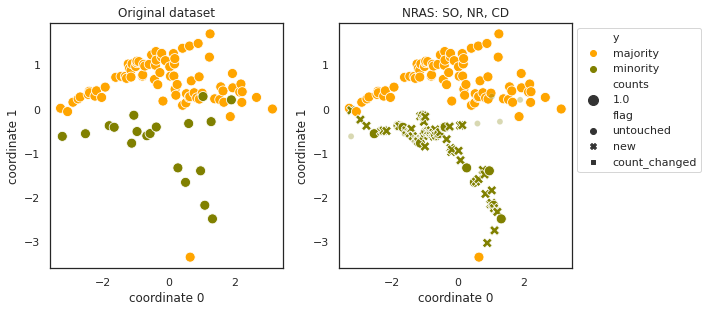

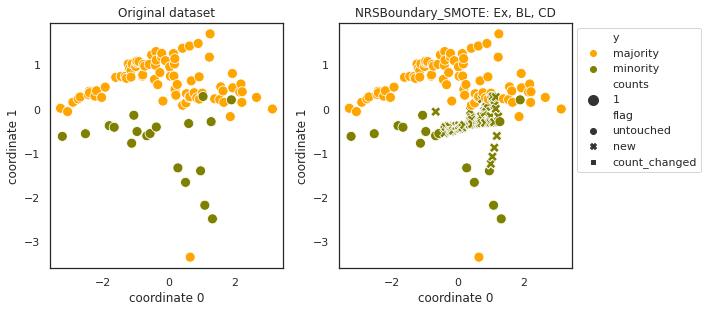

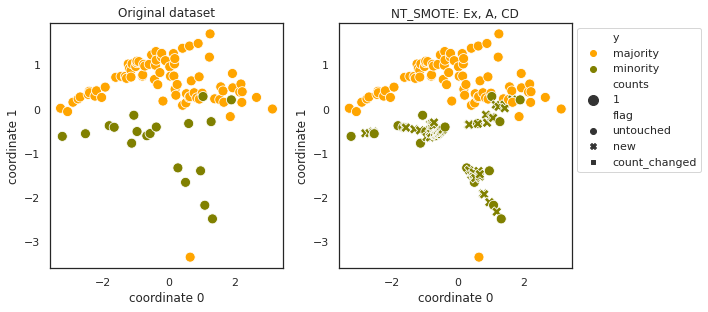

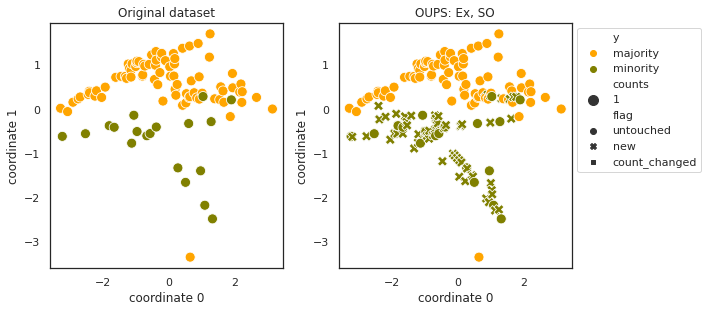

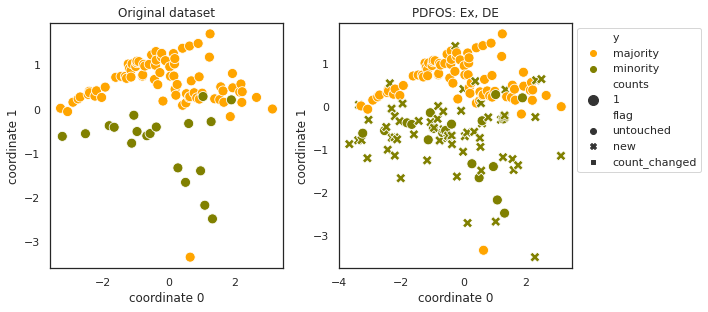

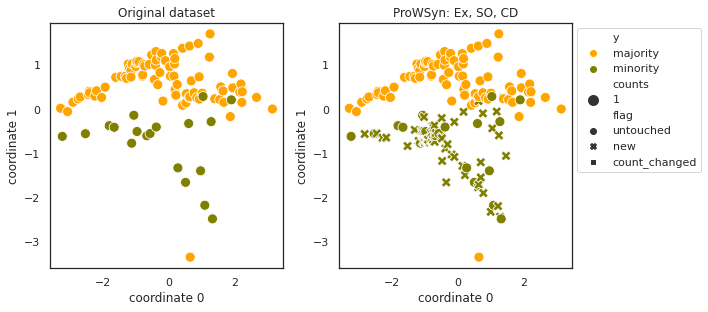

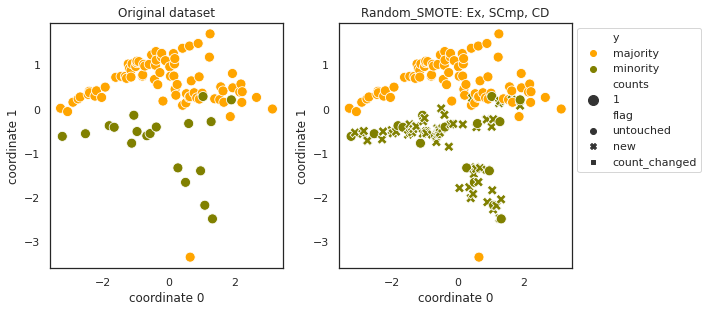

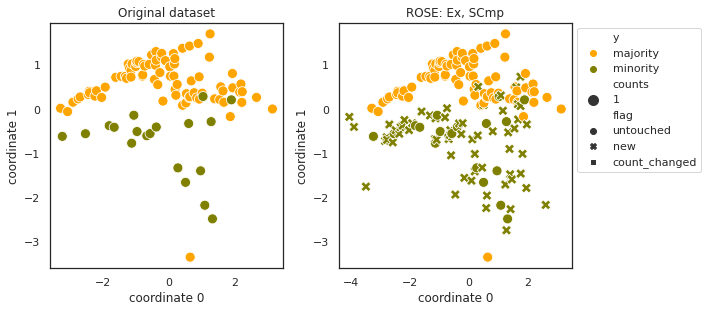

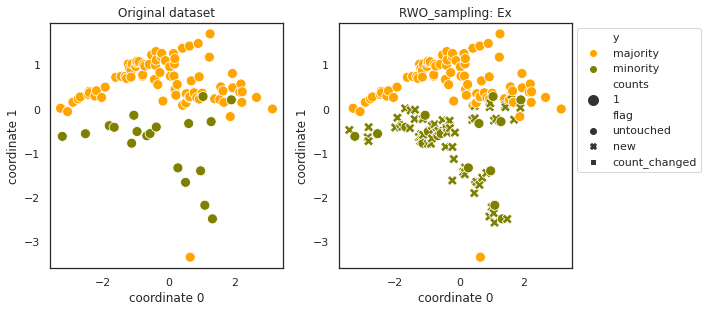

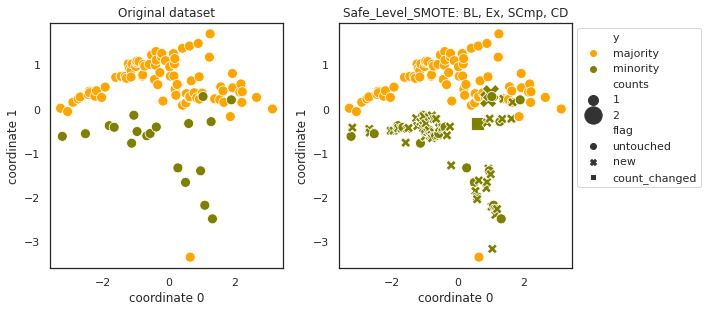

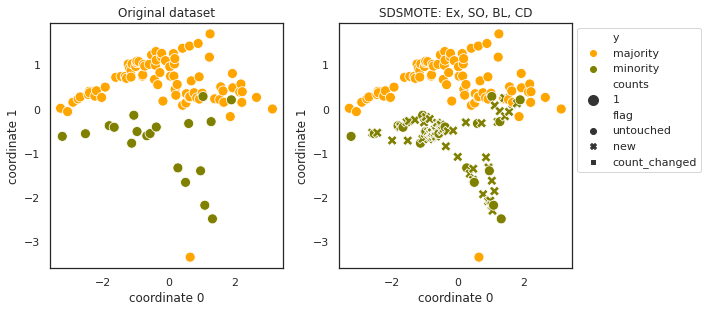

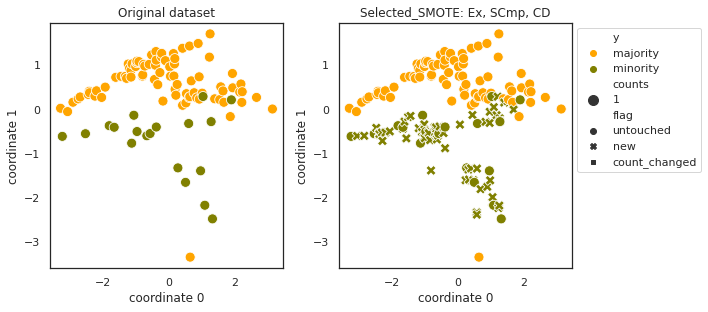

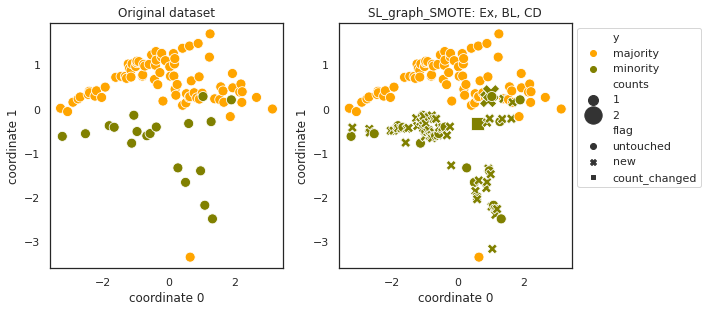

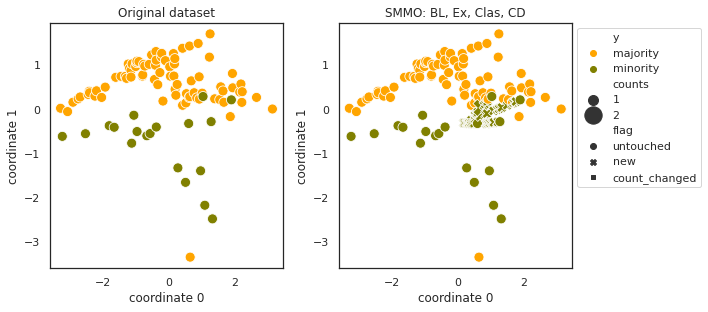

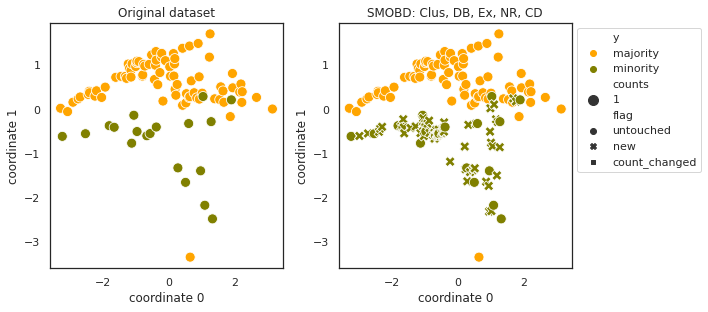

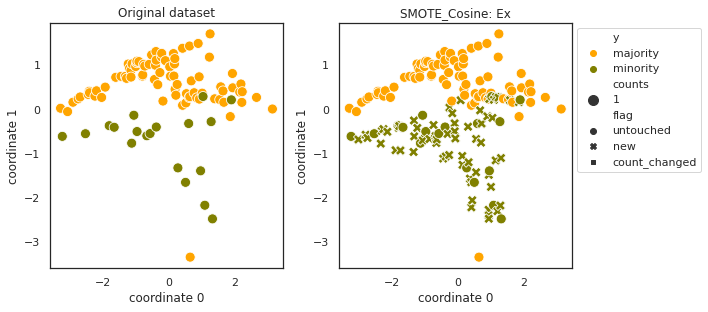

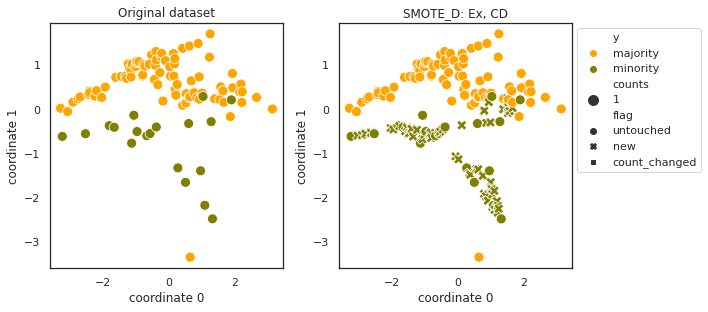

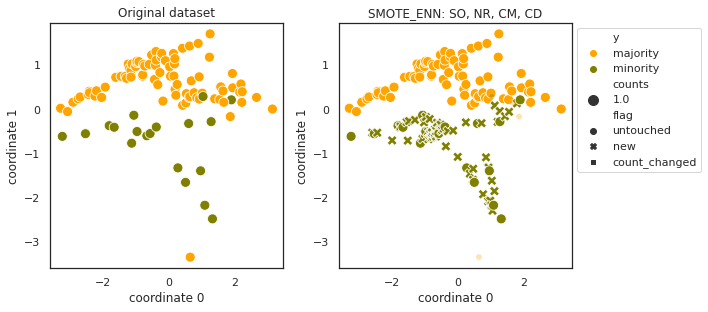

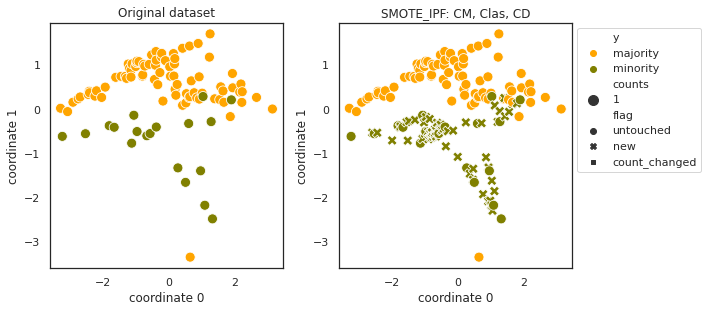

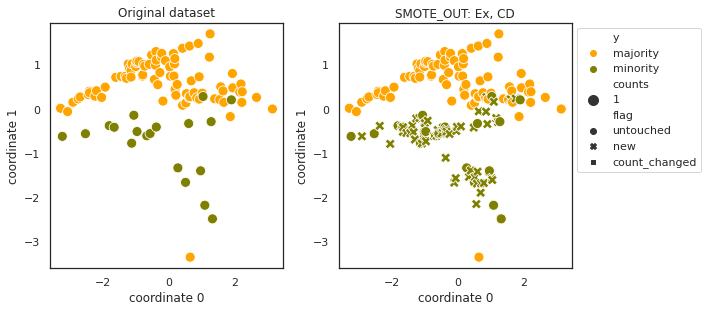

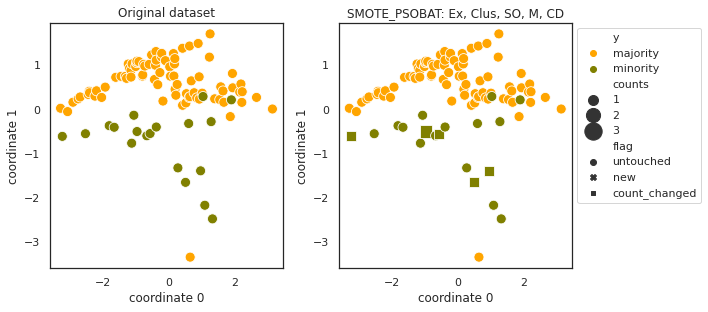

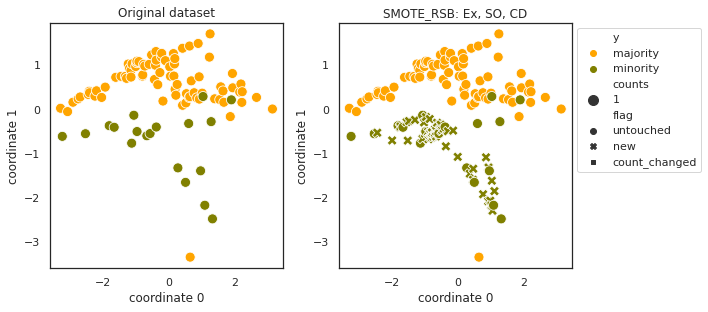

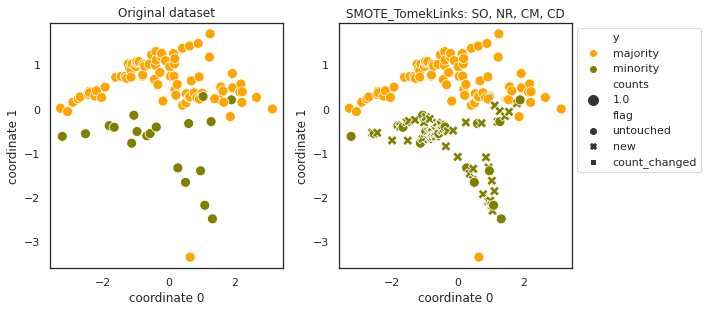

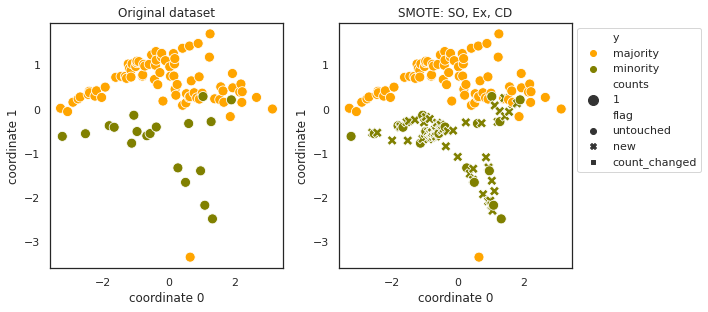

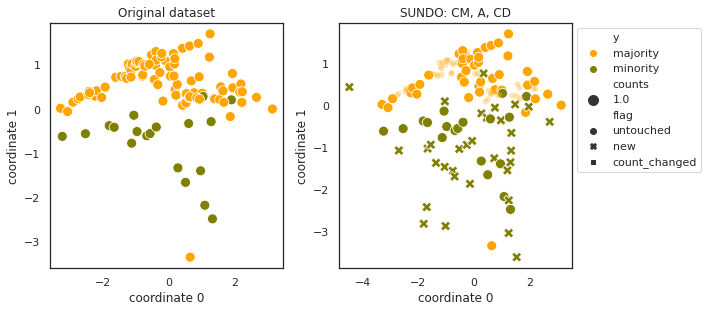

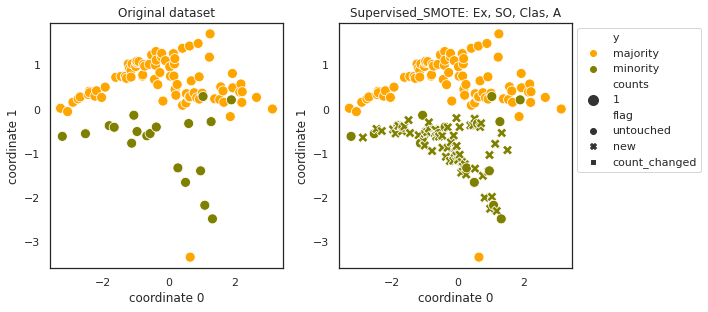

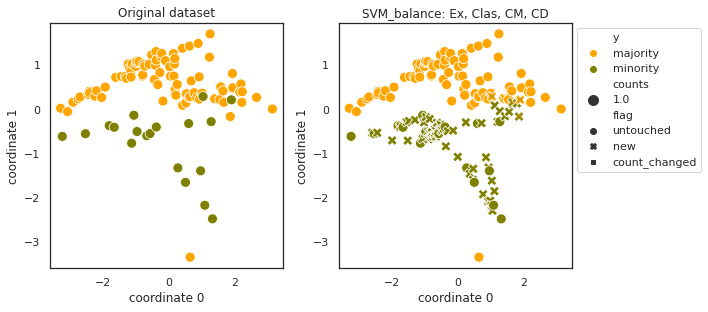

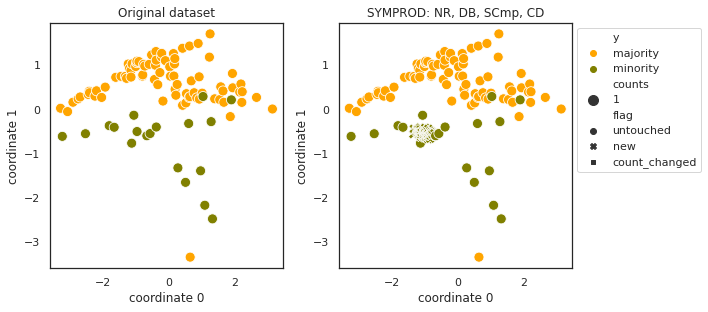

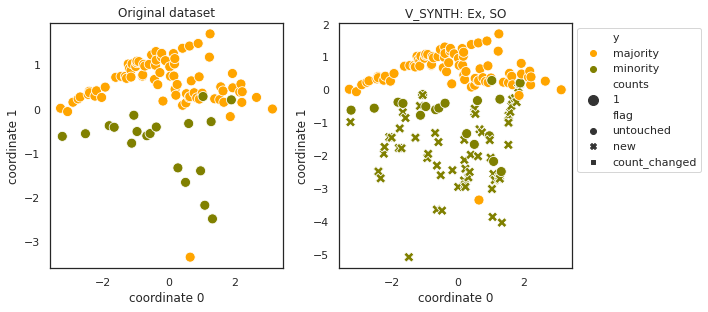

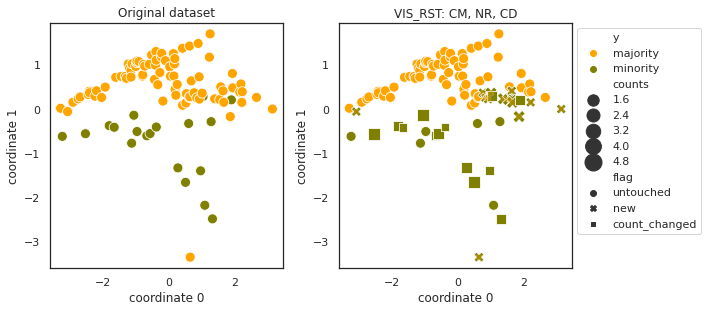

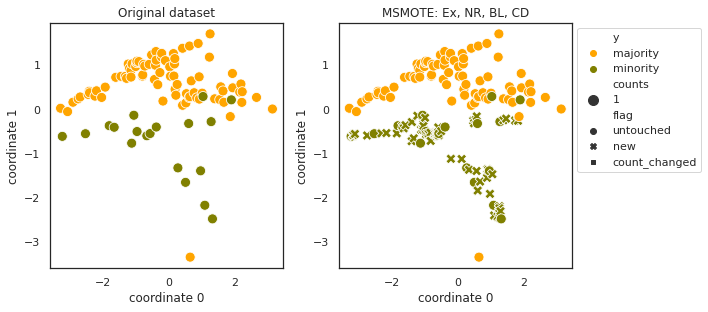

In [7]:
for o in oversamplers:
    oversampler= o(random_state=13)
    X_samp, y_samp= oversampler.sample(X, y)
    
    fig = sv.visualization.plot_sampling_raw(X=X, y=y,
                                             X_samp=X_samp,
                                             y_samp=y_samp,
                                             title=(o.__name__ + ': ' \
                                                    + ', '.join(o.categories)))
    
    fig.tight_layout()
    
    plt.show()
    filename = os.path.join(path, o.__name__ + '.png')
    fig.savefig(filename, format='png')
    